In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [16]:
# def return_time(file)
root = "results"
print(sorted(os.listdir(root)))
for exp_type in sorted(os.listdir(root)):
    for sf in os.listdir(os.path.join(root, exp_type)):
        for f in os.listdir(os.path.join(root, exp_type, sf)):
            print(os.path.join(root,exp_type, sf, f))

['lane', 'thread']
results/lane/0.3/msbfs_64_1000_1000000_4.out
results/lane/0.3/msbfs_64_1000_1000000_2.out
results/lane/0.3/msbfs_64_1000_1000000_1.out
results/lane/0.1/msbfs_64_1000_1000000_4.out
results/lane/0.1/msbfs_64_1000_1000000_2.out
results/lane/0.1/msbfs_64_1000_1000000_1.out
results/thread/0.3/vertex_64_1000_1000000_1.out
results/thread/0.3/msbfs_64_1000_1000000_4.out
results/thread/0.3/msbfs_64_1000_1000000_2.out
results/thread/0.3/vertex_64_1000_1000000_2.out
results/thread/0.3/msbfs_64_1000_1000000_1.out
results/thread/0.3/edge_64_1000_1000000_2.out
results/thread/0.3/edge_64_1000_1000000_1.out
results/thread/0.3/edge_64_1000_1000000_4.out
results/thread/0.3/vertex_64_1000_1000000_4.out
results/thread/0.1/vertex_64_1000_1000000_1.out
results/thread/0.1/msbfs_64_1000_1000000_4.out
results/thread/0.1/msbfs_64_1000_1000000_2.out
results/thread/0.1/vertex_64_1000_1000000_2.out
results/thread/0.1/msbfs_64_1000_1000000_1.out
results/thread/0.1/edge_64_1000_1000000_2.out
resul

In [34]:
result_df = pd.DataFrame(columns=["exp_type", "file", "sf", "lane_count", "vertex_count", "edge_count", "thread_count", "time"])

root = "results"
curr_dir = []
for exp_type in sorted(os.listdir(root)):
    print(exp_type)
    for sf in os.listdir(os.path.join(root, exp_type)):
        for f in os.listdir(os.path.join(root, exp_type, sf)):
            with open(os.path.join(root,exp_type, sf, f)) as output_file:
                f_list = f.split("_")
                file = f_list[0]
                lane = f_list[1]
                v_cnt = f_list[2]
                e_cnt = f_list[3]
                thread = f_list[4].split(".")[0]
                for time in output_file.readlines():
                    if time.strip() == 'TIMEOUT':
                        print(time_cpy)
                        time_cpy = 30
                    else:
                        time_cpy = round(float(time.strip()), 3)
                    result_df.loc[len(result_df.index)] = [exp_type, file, sf, int(lane), v_cnt, e_cnt, int(thread), time_cpy]
# result_df.columns = 
    # get experiment config
#     with open(os.path.join(root, f, "config.json")) as config_file:

lane
thread


In [35]:
result_df

,exp_type,file,sf,lane_count,vertex_count,edge_count,thread_count,time
0,lane,msbfs,0.3,64,1000,1000000,4,4.417
1,lane,msbfs,0.3,64,1000,1000000,4,4.517
2,lane,msbfs,0.3,64,1000,1000000,4,4.431
3,lane,msbfs,0.3,64,1000,1000000,4,4.431
4,lane,msbfs,0.3,64,1000,1000000,4,4.458
...,...,...,...,...,...,...,...,...
115,thread,vertex,0.1,64,1000,1000000,4,0.003
116,thread,vertex,0.1,64,1000,1000000,4,0.005
117,thread,vertex,0.1,64,1000,1000000,4,0.002
118,thread,vertex,0.1,64,1000,1000000,4,0.003


In [36]:
### thread plots
thread_df = result_df[result_df["exp_type"] == "thread" ]


In [20]:
# thread_e_v_df = thread_df[thread_df["file"] != "msbfs"]

In [22]:
# set(result_df["sf"])

{'0.1', '0.3'}

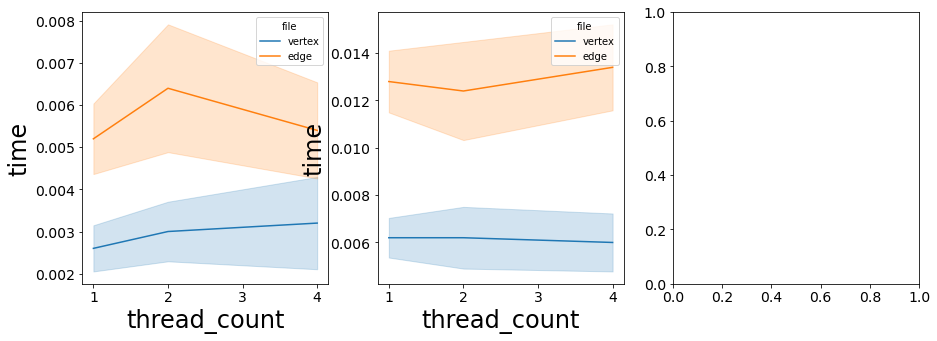

In [38]:
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
thread_create_csr_df = thread_df[thread_df["file"] != "msbfs"]
sf_list = list(set(result_df["sf"]))
for i in range(len(sf_list)):
    temp_df = thread_create_csr_df[thread_create_csr_df["sf"] == sf_list[i]]
    sns.lineplot(ax = axes[i], x="thread_count", y= "time" , hue="file", ci="sd", data=temp_df )


In [25]:
def plot_thread(data_df, sf_list):
    for i in range(len(sf_list)):
        temp_df = data_df[data_df["sf"] == sf_list[i]]
        sns.lineplot(ax = axes[i], x="thread_count", y= "time" , hue="file", ci="sd", data=temp_df )


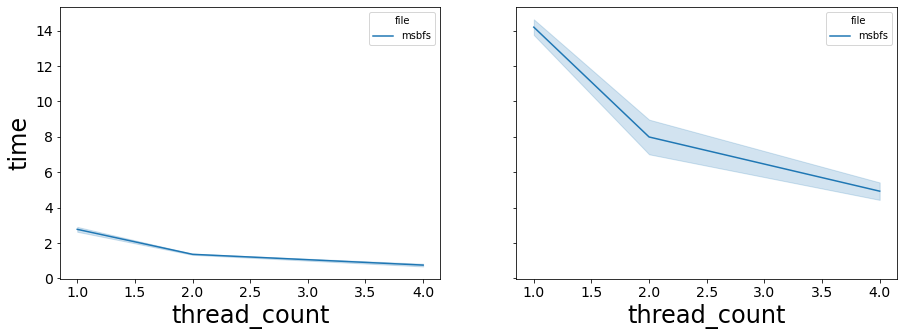

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
msbfs_df = thread_df[thread_df['file'] == "msbfs"] 
plot_thread(msbfs_df, sf_list)


0.1


(0.0, 0.006)

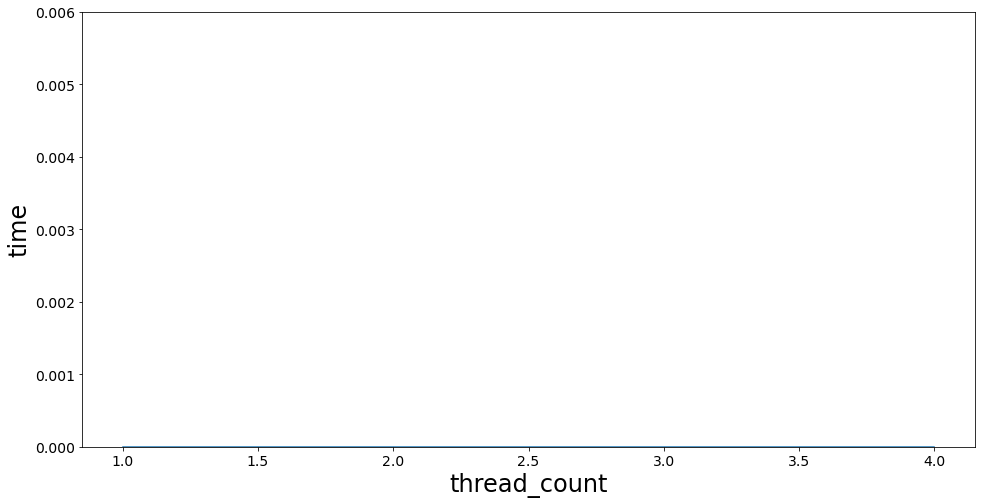

In [33]:
i = 0
print(sf_list[i])
vertex_df = thread_df[thread_df['file'] == "vertex"]
temp_df = vertex_df[vertex_df["sf"] == sf_list[i]]
sns.lineplot(x="thread_count", y= "time" , ci="sd", data=temp_df, )
plt.ylim([0, 0.006])



In [64]:
lane_df = result_df[result_df["exp_type"] == "lane"]

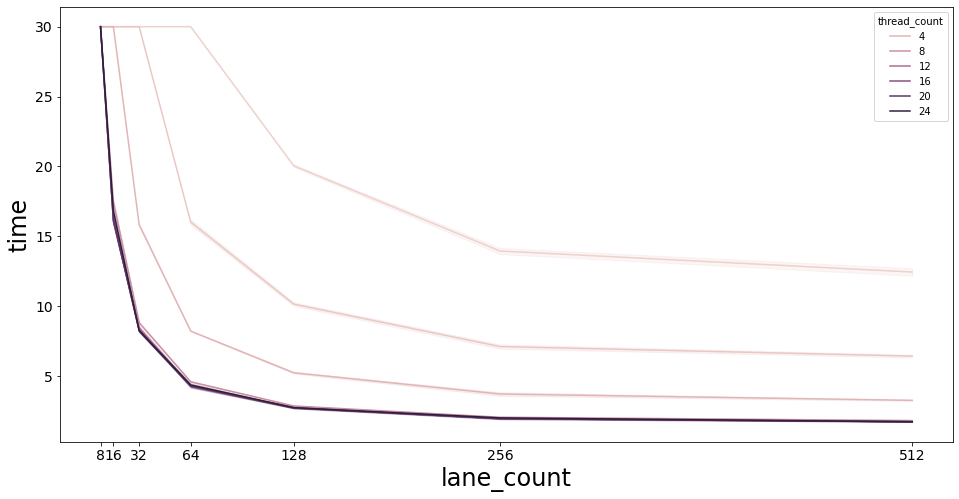

In [66]:
g = sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )
g.set_xticks([8, 16, 32, 64, 128, 256, 512])

<AxesSubplot:xlabel='lane_count', ylabel='time'>

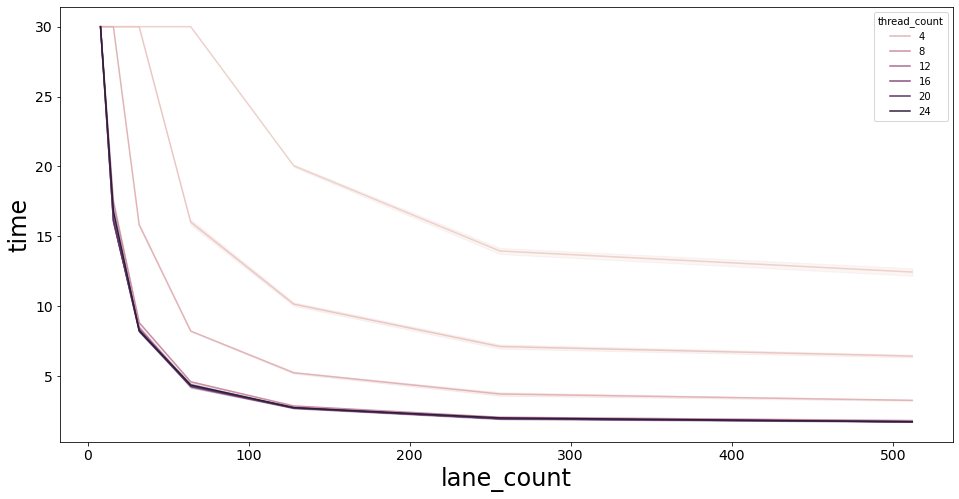

In [67]:
sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )